<a href="https://colab.research.google.com/github/gisleinecosta/exercicios/blob/main/Grupo6_portfolioPython1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Portfólio Grupo 6 - Programa Pole Tech Americanas - ADA**

Disciplina: DS-PY-004 TÉCNICAS DE PROGRAMAÇÃO I (PY)

Professor: Carlos Stefano Filho / Romero Carvalho

Integrantes:

* Andréia Gonçalves - https://www.linkedin.com/in/andreiagoncalvesbh/
* Fabiano - https://www.linkedin.com/in/fabiano-s-rodrigues-13983b78/
* Gisleine P. - https://www.linkedin.com/in/gisleine-p-a04790174/
* Guilherme- https://www.linkedin.com/in/guilherme-oliveira-da-rocha-cunha-87852a1b3
* Luís - https://www.linkedin.com/in/luiz-eduardo-boa-vista-684497250

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **1.Descrição da base de dados**

A base de dados utilizada foi retirada do Kaggle e contém informações extraídas da web de 10 mil aplicativos da Play Store para análise do mercado Android no ano de 2018. Inicialmente o dado possui 10841 observações, e 13 colunas com informações de preço, gênero, público alvo e avaliação dos usuários, entre outros.

**Referencia:** https://www.kaggle.com/datasets/lava18/google-play-store-apps

#**2.Processamento dos Dados**

## **2.1.Bibliotecas**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import re

## **2.2.Carregamento do base de dados**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Ada/googleplaystore.csv")

## **2.3.Informações iniciais sobre os dados**
Identificação do tipo de dado; quantidade de dados faltantes; como os dados se distribuiem antes do tratamento. 

### **2.3.1.Como os dados foram carregados?**

In [ ]:
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [ ]:
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


### **2.3.2.Qual o tipo de cada coluna?**

In [ ]:
#10841 entries , 13 columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### **2.3.3.Por qual motivo algumas colunas estão com o tipo inapropriado para o tipo de variável?**

In [ ]:
#strings em colunas que seriam float
df.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### **2.3.4.Quantos dados faltantes há na base de dados?**

In [ ]:
df.isnull().sum().sort_values(ascending = False)

Rating            1474
Current Ver          8
Android Ver          3
Type                 1
Content Rating       1
App                  0
Category             0
Reviews              0
Size                 0
Installs             0
Price                0
Genres               0
Last Updated         0
dtype: int64

### **2.3.5.Percentualmente, quanto de dados faltantes tem cada coluna?**

In [ ]:
#'Rating' = aprox. 14%
#aceitável = até 5% 
df.isnull().mean().sort_values(ascending = False).round(4)*100

Rating            13.60
Current Ver        0.07
Android Ver        0.03
Type               0.01
Content Rating     0.01
App                0.00
Category           0.00
Reviews            0.00
Size               0.00
Installs           0.00
Price              0.00
Genres             0.00
Last Updated       0.00
dtype: float64

## **2.4.Tratamento dos Dados**
Decisão: tratar por cada coluna individualmente.

In [ ]:
#salvando o banco a ser tratado em outra variável
df1 = df.copy()

### **2.4.1-Eliminação das colunas que não serão utilizadas na EDA**

In [ ]:
df1.drop(columns=['Current Ver','Android Ver','Last Updated'], inplace=True)
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity


### **2.4.2-Tratamento da Coluna ['App'] em relação a coluna['Last Updated']**
"Retirar os aplicativos duplicados, tendo como condição a data da 'primeira' versão. (Todos possuem primeira versão, mas nem todos teriam mais de uma versão.)"

In [ ]:
# print(type(df1['Last Updated'][0])) # tipo original do dado
# print(type(pd.to_datetime(df1['Last Updated'][0]))) # tipo de dado após conversão para datetime

In [ ]:
# print(df1['Last Updated'].min())
# print(df1['Last Updated'].max())

1.0.19
September 9, 2017


In [ ]:
# df1['Last Updated']

0         January 7, 2018
1        January 15, 2018
2          August 1, 2018
3            June 8, 2018
4           June 20, 2018
               ...       
10836       July 25, 2017
10837        July 6, 2018
10838    January 20, 2017
10839    January 19, 2015
10840       July 25, 2018
Name: Last Updated, Length: 10841, dtype: object

In [ ]:
# #manter apenas o ano - para retirr os duplicados mais atuais. deixando o ano mais antigo
# df1['Last Updated_year'] = df1['Last Updated'].str[-4:]
# df1['Last Updated_year'].astype('category')

0        2018
1        2018
2        2018
3        2018
4        2018
         ... 
10836    2017
10837    2018
10838    2017
10839    2015
10840    2018
Name: Last Updated_year, Length: 10841, dtype: category
Categories (10, object): ['0.19', '2010', '2011', '2012', ..., '2015', '2016', '2017', '2018']

In [ ]:
# df1['Last Updated_year'].describe(include=['category'])

count     10841
unique       10
top        2018
freq       7349
Name: Last Updated_year, dtype: object

In [ ]:
# df1['Last Updated_year'].unique()

array(['2018', '2017', '2014', '2016', '2015', '2013', '2012', '2011',
       '2010', '0.19'], dtype=object)

In [ ]:
# #identificado o objeto com valor de ano errado
# df1.loc[(df1['Last Updated_year']=='0.19')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Last Updated_year
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,0.19


In [ ]:
# df1['App'].describe(include=['category'])

count      10841
unique      9660
top       ROBLOX
freq           9
Name: App, dtype: object

In [ ]:
df1['App'].unique()

array(['Photo Editor & Candy Camera & Grid & ScrapBook',
       'Coloring book moana',
       'U Launcher Lite – FREE Live Cool Themes, Hide Apps', ...,
       'Parkinson Exercices FR', 'The SCP Foundation DB fr nn5n',
       'iHoroscope - 2018 Daily Horoscope & Astrology'], dtype=object)

In [ ]:
df1.loc[(df1['App']=='Life Made WI-Fi Touchscreen Photo Frame')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Last Updated_year
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,0.19


In [ ]:
#Para mater a concisão dos dados a linha será dropada;
df1.drop(10472, inplace=True)

In [ ]:
df1.drop_duplicates(subset=['App'], keep='first', inplace=True)

In [ ]:
df1['App'].duplicated().agg('sum')

0

In [ ]:
df1.isnull().mean().sort_values(ascending = False).round(4)*100

Rating            15.15
Type               0.01
App                0.00
Category           0.00
Reviews            0.00
Size               0.00
Installs           0.00
Price              0.00
Content Rating     0.00
Genres             0.00
dtype: float64

**O ideal era ter retirado os duplicados baseados no ano de versão mais antiga, mas faltou conhecimento. A partir daí tomamos a decisão de retirar a coluna 'Last Update' e manter os valores únicos do 'App' pelo drop.duplicate 'fist'**

### **2.4.2-Tratamento da Coluna ['Price'] - "Por que está como 'object', ao invés de 'float'?**

In [ ]:
#visualização 
print(df1["Price"].unique())

['0' '$4.99' '$3.99' '$6.99' '$1.49' '$2.99' '$7.99' '$5.99' '$3.49'
 '$1.99' '$9.99' '$7.49' '$0.99' '$9.00' '$5.49' '$10.00' '$24.99'
 '$11.99' '$79.99' '$16.99' '$14.99' '$1.00' '$29.99' '$12.99' '$2.49'
 '$10.99' '$1.50' '$19.99' '$15.99' '$33.99' '$74.99' '$39.99' '$3.95'
 '$4.49' '$1.70' '$8.99' '$2.00' '$3.88' '$25.99' '$399.99' '$17.99'
 '$400.00' '$3.02' '$1.76' '$4.84' '$4.77' '$1.61' '$2.50' '$1.59' '$6.49'
 '$1.29' '$5.00' '$13.99' '$299.99' '$379.99' '$37.99' '$18.99' '$389.99'
 '$19.90' '$8.49' '$1.75' '$14.00' '$4.85' '$46.99' '$109.99' '$154.99'
 '$3.08' '$2.59' '$4.80' '$1.96' '$19.40' '$3.90' '$4.59' '$15.46' '$3.04'
 '$4.29' '$2.60' '$3.28' '$4.60' '$28.99' '$2.95' '$2.90' '$1.97'
 '$200.00' '$89.99' '$2.56' '$30.99' '$3.61' '$394.99' '$1.26' '$1.20'
 '$1.04']


In [ ]:
#Eliminação do caractere "$" para e depois converter os dados em float
df1['Price'].astype('string')

0        0
1        0
2        0
3        0
4        0
        ..
10836    0
10837    0
10838    0
10839    0
10840    0
Name: Price, Length: 9666, dtype: string

In [ ]:
#Atribuição da transformação do tipo
df1['Price'] = df1['Price'].str.replace('$', '', regex=True)

In [ ]:
df1['Price'] = df1['Price'].astype('float')

In [ ]:
df1["Price"].sort_values().unique()

array([  0.  ,   0.99,   1.  ,   1.04,   1.2 ,   1.26,   1.29,   1.49,
         1.5 ,   1.59,   1.61,   1.7 ,   1.75,   1.76,   1.96,   1.97,
         1.99,   2.  ,   2.49,   2.5 ,   2.56,   2.59,   2.6 ,   2.9 ,
         2.95,   2.99,   3.02,   3.04,   3.08,   3.28,   3.49,   3.61,
         3.88,   3.9 ,   3.95,   3.99,   4.29,   4.49,   4.59,   4.6 ,
         4.77,   4.8 ,   4.84,   4.85,   4.99,   5.  ,   5.49,   5.99,
         6.49,   6.99,   7.49,   7.99,   8.49,   8.99,   9.  ,   9.99,
        10.  ,  10.99,  11.99,  12.99,  13.99,  14.  ,  14.99,  15.46,
        15.99,  16.99,  17.99,  18.99,  19.4 ,  19.9 ,  19.99,  24.99,
        25.99,  28.99,  29.99,  30.99,  33.99,  37.99,  39.99,  46.99,
        74.99,  79.99,  89.99, 109.99, 154.99, 200.  , 299.99, 379.99,
       389.99, 394.99, 399.99, 400.  ])

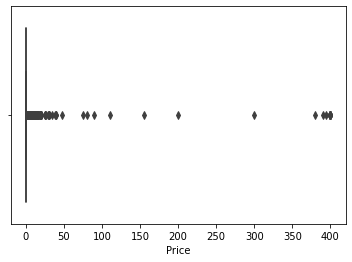

In [ ]:
sns.boxplot(x=df1["Price"])

### **2.4.3-Tratamento da Coluna ['Size'] - Limpar e agregar, para depois fazer o encoding** 
Não usaremos

In [ ]:
# #Agregação 
# conditions = [
#   (df1['Size'].isna()),
#   (df1['Size'] =='Varies with device'),
#   (df1['Size'] <= '11M'),
#   (df1['Size'] > '11M') & (df1['Size'] <= '14M'),
#   (df1['Size'] > '14M')
#     ]
# values = [np.nan, 0, 1, 2, 3]

# # em np.select, as duas listas precisam ter o mesmo tamanho
# df1['Size_2'] = np.select(conditions, values) # Construindo variável

# df1[['Size_2']].value_counts(sort = False) # Avaliando frequência

# df1[['Size','Size_2']]


,Size,Size_2
0,19M,3.0
1,14M,2.0
2,8.7M,3.0
3,25M,3.0
4,2.8M,3.0
...,...,...
10836,53M,3.0
10837,3.6M,3.0
10838,9.5M,3.0
10839,Varies with device,0.0


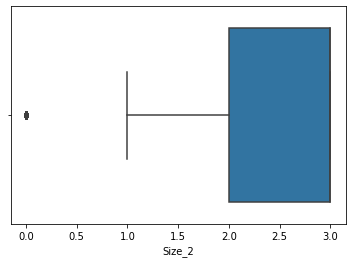

In [ ]:
# #Gráfico de Distribuição - df1['Size'] 
# # sns.boxplot(df1, x = "Size_2", bins=5)
# sns.boxplot(x=df1["Size_2"])

In [ ]:
# df1['Size_2'].value_counts()

3.0    7829
0.0    1695
1.0     729
2.0     588
Name: Size_2, dtype: int64

In [ ]:
#encoding necessário para análises futuras

### **2.4.4-Tratamento da Coluna ['Content Rating'] - Encoding**

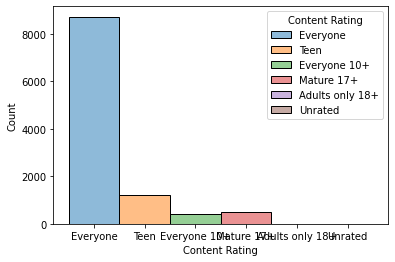

In [ ]:
#Gráfico de Distribuição 
sns.histplot(df, x = "Content Rating", hue = "Content Rating", bins=20)


In [ ]:
df1['Content Rating'].value_counts()

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

### **2.4.5-Tratamento da Coluna ['Genres'] - Limpar e agregar, para depois fazer o encoding**

In [ ]:
#Pegar os principais e agragar os outros
df1['Genres'].value_counts()

Tools                     842
Entertainment             623
Education                 549
Medical                   463
Business                  460
                         ... 
Arcade;Pretend Play         1
Card;Brain Games            1
Lifestyle;Pretend Play      1
Comics;Creativity           1
Strategy;Creativity         1
Name: Genres, Length: 120, dtype: int64

/usr/local/lib/python3.8/dist-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


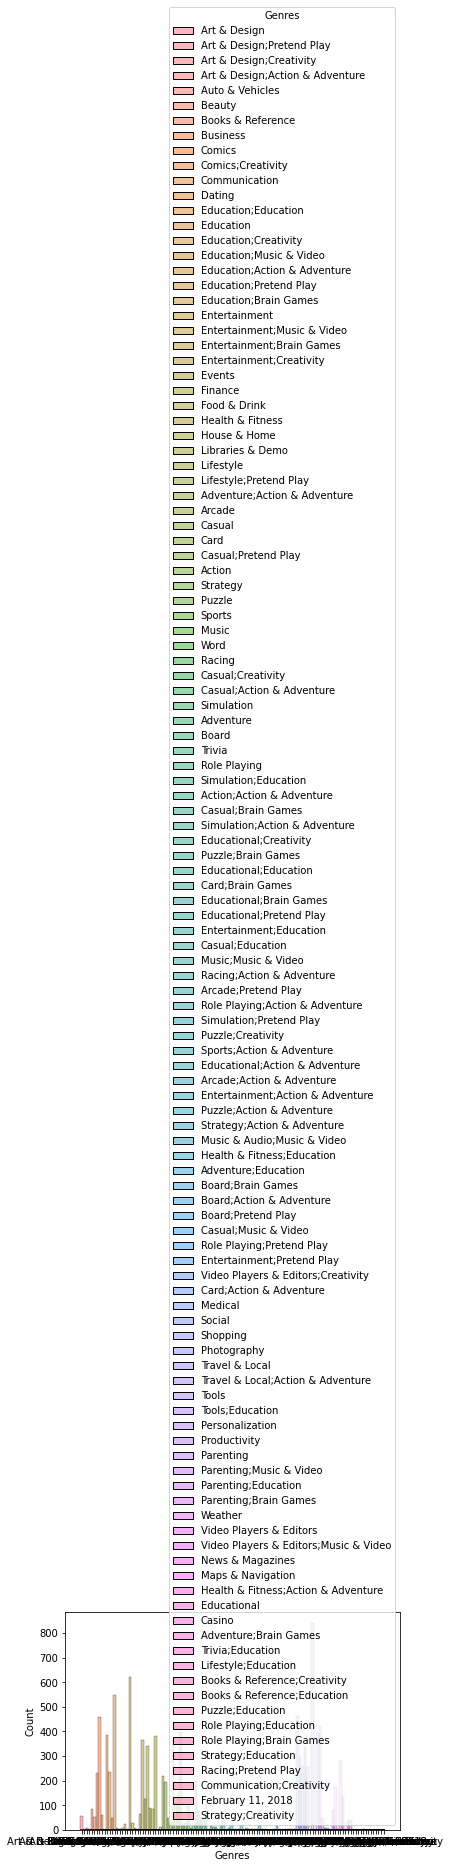

In [ ]:
#Gráfico de Distribuição 
sns.histplot(df, x = "Genres", hue = "Genres", bins=20)

In [ ]:
#Agregação 
conditions = [
  (df1['Genres'] =='Entertainment'),
  (df1['Genres'] =='Education'),
  (df1['Genres'] =='Medical'),
  (df1['Genres'] =='Business'),
  (df1['Genres'] !='Business') & (df1['Genres'] !='Entertainment') & (df1['Genres'] !='Education') & (df1['Genres'] !='Medical')
    ]
values = [0, 1, 2, 3, 4]

# em np.select, as duas listas precisam ter o mesmo tamanho
df1['Genres_2'] = np.select(conditions, values) # Construindo variável

df1[['Genres_2']].value_counts(sort = False) # Avaliando frequência

df1[['Genres','Genres_2']]


,Genres,Genres_2
0,Art & Design,4
1,Art & Design;Pretend Play,4
2,Art & Design,4
3,Art & Design,4
4,Art & Design;Creativity,4
...,...,...
10836,Education,1
10837,Education,1
10838,Medical,2
10839,Books & Reference,4


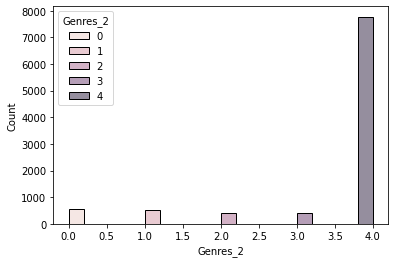

In [ ]:
#Gráfico de Distribuição 
sns.histplot(df1, x = "Genres_2", hue = "Genres_2", bins=20)

Deveria arrumar a parte do gráfico

### **2.4.-Tratamento da Coluna ['Install'] - "Por que está como 'object', ao invés de 'float'?**

In [ ]:
#Eliminação do caractere "+" 
df1['Installs'] = df1['Installs'].str.replace('+', '', regex=True)

In [ ]:
#Conversão  dos dados para float
df1['Installs'] = df1['Installs'].replace(',', '', regex=True).astype('float')

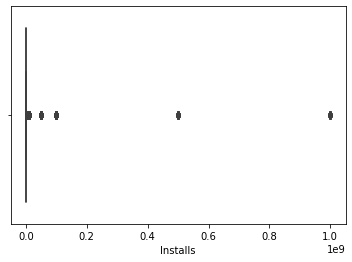

In [ ]:
sns.boxplot(x=df1["Installs"])

### **2.4.6-Tratamento da Coluna ['Type']**

In [ ]:
df1['Type'].value_counts()

Free    8902
Paid     756
Name: Type, dtype: int64

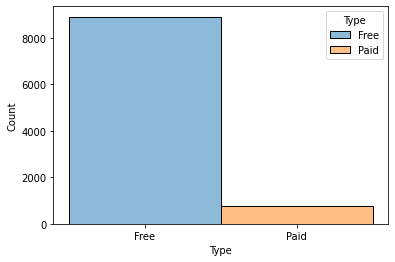

In [ ]:
sns.histplot(df1, x = "Type", hue = "Type", bins=20)

# **3.Análise Exploratória**

**Análises**
* Taxa de apps pagos e gratuitos por categoria
* Taxa de apps pagos e gratuitos por idade: "existem mais apps gratuitos para adultos ou crianças?"
* Relação entre rating e review: existe correlação entre a qtd de reviews e o rating dos apps?
* Relação entre price e installs: o valor do app pode influenciar na preferência em baixá-lo?
* Relação entre rating e preço: o preço do app pode influenciar na sua nota?
* Relaçao entre rating e installs: um aplicativo ter uma boa nota quer dizer que ele tem muitos downloads, e vice-versa?
* Relação entre categoria e rating: quais generos apresentam as melhores notas? Dentre esses com a melhores notas, a maioria é pago ou gratuito?

Decisões de negócios
1)Exclusão das colunas 'Current Ver' , 'Android Ver' e 'Last Updated' por não serem relevantes;
2)Limpeza de observações em colunas inapropriadas. Exemplo a palavra  'Varies with device'. 


### **3.1-Taxa de apps pagos e gratuitos por categoria**

In [ ]:
taxa_type = pd.DataFrame(df1[['Category','Type']])

In [ ]:
Percentual = df1.groupby("Category")["Type"].value_counts() / df1.groupby("Category")['Type'].count() * 100

In [ ]:
Percentual.round(2)

Category           Type
ART_AND_DESIGN     Free     95.31
                   Paid      4.69
AUTO_AND_VEHICLES  Free     96.47
                   Paid      3.53
BEAUTY             Free    100.00
                            ...  
TRAVEL_AND_LOCAL   Paid      5.48
VIDEO_PLAYERS      Free     97.55
                   Paid      2.45
WEATHER            Free     89.87
                   Paid     10.13
Name: Type, Length: 63, dtype: float64

In [ ]:
Percentual.index

MultiIndex([(     'ART_AND_DESIGN', 'Free'),
            (     'ART_AND_DESIGN', 'Paid'),
            (  'AUTO_AND_VEHICLES', 'Free'),
            (  'AUTO_AND_VEHICLES', 'Paid'),
            (             'BEAUTY', 'Free'),
            ('BOOKS_AND_REFERENCE', 'Free'),
            ('BOOKS_AND_REFERENCE', 'Paid'),
            (           'BUSINESS', 'Free'),
            (           'BUSINESS', 'Paid'),
            (             'COMICS', 'Free'),
            (      'COMMUNICATION', 'Free'),
            (      'COMMUNICATION', 'Paid'),
            (             'DATING', 'Free'),
            (             'DATING', 'Paid'),
            (          'EDUCATION', 'Free'),
            (          'EDUCATION', 'Paid'),
            (      'ENTERTAINMENT', 'Free'),
            (      'ENTERTAINMENT', 'Paid'),
            (             'EVENTS', 'Free'),
            (             'EVENTS', 'Paid'),
            (             'FAMILY', 'Free'),
            (             'FAMILY', 'Paid'),
          

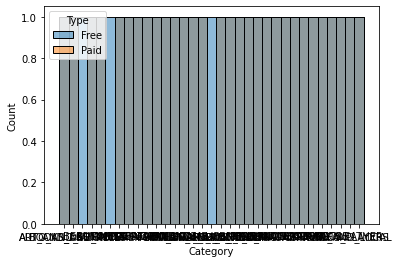

In [ ]:
sns.histplot(Percentual, x = "Category", hue = "Type", bins=15)

### **3.2-Taxa de apps pagos e gratuitos por idade.**

In [ ]:
taxa_contentRating = df1.groupby("Content Rating")["Type"].value_counts() / df1.groupby("Content Rating")['Type'].count() * 100

In [ ]:
taxa_contentRating.round(2)

Content Rating   Type
Adults only 18+  Free    100.00
Everyone         Free     91.71
                 Paid      8.29
Everyone 10+     Free     90.34
                 Paid      9.66
Mature 17+       Free     95.42
                 Paid      4.58
Teen             Free     94.98
                 Paid      5.02
Unrated          Free    100.00
Name: Type, dtype: float64

### **3.3-Relação entre rating e review: existe correlação entre a qtd de reviews e o rating dos apps?**

In [ ]:
df_ratingmean = df1[df1['Rating'] == df1['Rating'].mean().round(1)]

In [ ]:
df_ratingmean

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Genres_2
12,Tattoo Name On My Photo Editor,ART_AND_DESIGN,4.2,44829,20M,10000000.0,Free,0.0,Teen,Art & Design,4
30,Pink Silver Bow Keyboard Theme,ART_AND_DESIGN,4.2,1120,9.2M,100000.0,Free,0.0,Everyone,Art & Design,4
33,Easy Origami Ideas,ART_AND_DESIGN,4.2,1015,11M,100000.0,Free,0.0,Everyone,Art & Design,4
40,Drawing Clothes Fashion Ideas,ART_AND_DESIGN,4.2,117,15M,10000.0,Free,0.0,Everyone,Art & Design,4
44,Popsicle Sticks and Similar DIY Craft Ideas,ART_AND_DESIGN,4.2,26,12M,10000.0,Free,0.0,Everyone,Art & Design,4
...,...,...,...,...,...,...,...,...,...,...,...
10792,Soccer Clubs Logo Quiz,GAME,4.2,21661,16M,1000000.0,Free,0.0,Everyone,Trivia,4
10795,Reindeer VPN - Proxy VPN,TOOLS,4.2,7339,4.0M,100000.0,Free,0.0,Everyone,Tools,4
10804,Poker Pro.Fr,GAME,4.2,5442,17M,100000.0,Free,0.0,Teen,Card,4
10815,Golden Dictionary (FR-AR),BOOKS_AND_REFERENCE,4.2,5775,4.9M,500000.0,Free,0.0,Everyone,Books & Reference,4


In [ ]:
df_ratingmean['Reviews'].astype('int').describe().round(0)

count         810.0
mean       152684.0
std        596270.0
min             4.0
25%           658.0
50%          8661.0
75%         70043.0
max      10790289.0
Name: Reviews, dtype: float64

### **3.4-Relação entre price e installs: o valor do app pode influenciar na preferência em baixá-lo?**

In [ ]:
df_price = df1[df1['Price'] > 0]

In [ ]:
var = df_price.groupby("Price")['Installs'].sum()

In [ ]:
var

Price
0.99      19387373.0
1.00         10500.0
1.04            50.0
1.20         10000.0
1.26           100.0
             ...    
379.99        1000.0
389.99       10000.0
394.99           0.0
399.99      188100.0
400.00       10000.0
Name: Installs, Length: 91, dtype: float64

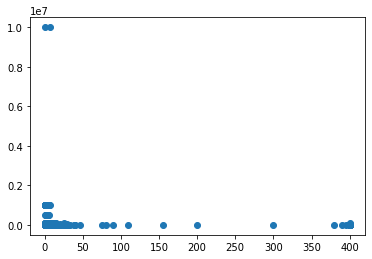

In [ ]:
x = df_price["Price"]
y = df_price["Installs"]

plt.scatter(x, y)
plt.show()

# **4.Conclusão**

### **4.1-Taxa de apps pagos e gratuitos por categoria**
Em todas as categorias, a demanda por aplicativos gratuitos superaram os pagos. 

### **4.2-Taxa de apps pagos e gratuitos por idade.**
Todos os aplicativos adultos são gratuitos. Para as demais faixas etárias, os aplicativos gratuitos representam mais do que 90%. Ou seja, não existe nenhuma faixa etária em que os aplicativos pagos possuem uma representatividade maior.


### **4.3-Relação entre rating e review: existe correlação entre a qtd de reviews e o rating dos apps?**
Não foi possível constatar correlação, uma vez que a média de rating tem uma variação de quantidade de avaliações muito grande. 

### **4.4-Relação entre price e installs: o valor do app pode influenciar na preferência em baixá-lo?**

Pelo gráfico de dispersão é possível identificar que as pessoas tem preferência por aplicativos gratuitos, e que a medida que o preço é incluído não há um crescimento significativo da demanda por aplicativos. 

# **5.Dúvidas:**

*   tópico 2.4.2 - df1['Last Updated'].dt.strftime('%d/%m/%Y') - tentei dividir a coluna em palavras de mês, dia e ano. Como fazer isso?


* Como encontrar sentenças que contenham determinada palavra? 
( import re   ---- re.findall(r'([^.]*Life Made[^.]*)', df1['App'])

* Transformar em pivot 